In [1]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import graphviz
import pydot

In [2]:
tf.__version__

'2.3.0'

In [3]:
keras.__version__

'2.4.0'

In [4]:
fashion_mnist = keras.datasets.fashion_mnist
(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist.load_data()

In [5]:
X_train_full.shape

(60000, 28, 28)

In [6]:
X_train_full.dtype

dtype('uint8')

In [7]:
X_test.shape

(10000, 28, 28)

In [8]:
y_test.shape

(10000,)

In [9]:
X_valid, X_train = X_train_full[:5000] / 255.0, X_train_full[5000:]/255.0
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]
X_test = X_test/255.

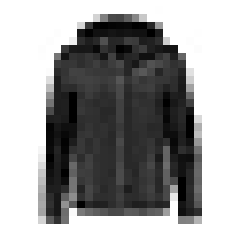

In [10]:
plt.imshow(X_train[0], cmap="binary")
plt.axis('off')
plt.show()

In [11]:
y_train

array([4, 0, 7, ..., 3, 0, 5], dtype=uint8)

In [12]:
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat", "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

In [13]:
class_names[y_train[0]]

'Coat'

Take a loot at the images in the datasets

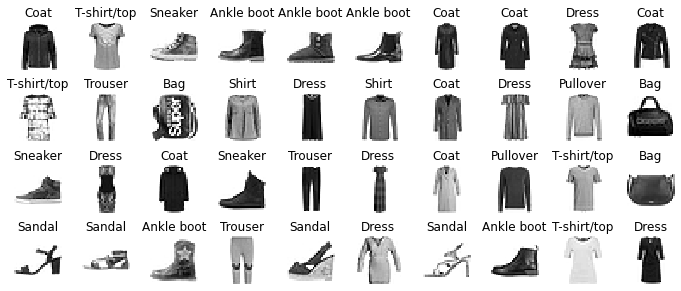

In [14]:
n_rows = 4
n_cols = 10
plt.figure(figsize=(n_cols * 1.2, n_rows * 1.2))
for row in range(n_rows):
    for col in range(n_cols):
        index = n_cols * row + col
        plt.subplot(n_rows, n_cols, index+1)
        plt.imshow(X_train[index], cmap="binary", interpolation="nearest")
        plt.axis('off')
        plt.title(class_names[y_train[index]], fontsize=12)
        
plt.subplots_adjust(wspace=0.2, hspace=0.5)
plt.show()

creating the model using the Sequential API

In [15]:
model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=[28, 28]))
model.add(keras.layers.Dense(300, activation="relu"))
model.add(keras.layers.Dense(100, activation="relu"))
model.add(keras.layers.Dense(10, activation="softmax"))

In [16]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 300)               235500    
_________________________________________________________________
dense_1 (Dense)              (None, 100)               30100     
_________________________________________________________________
dense_2 (Dense)              (None, 10)                1010      
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


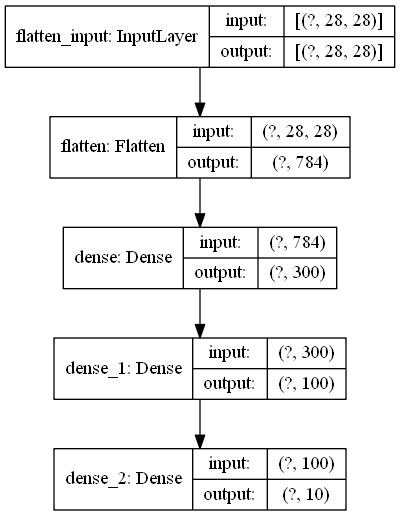

In [17]:
keras.utils.plot_model(model, "my_fashion_mnist_model.png", show_shapes=True)

In [18]:
model.layers

In [19]:
hidden1 = model.layers[1]
hidden1.name

'dense'

In [20]:
model.get_layer('dense') is hidden1

True

In [21]:
weights, biases = hidden1.get_weights()
weights

array([[-0.02264822, -0.06247644,  0.00182632, ..., -0.00950976,
         0.01449598, -0.02708333],
       [-0.04694045,  0.01475924, -0.06679659, ...,  0.01166824,
        -0.01755324,  0.03452396],
       [ 0.043687  , -0.06143859,  0.02255271, ...,  0.03624503,
        -0.03567797,  0.01270282],
       ...,
       [-0.06577482,  0.01511416,  0.0372433 , ...,  0.04525414,
         0.03253374,  0.03963316],
       [-0.04237176,  0.0133663 ,  0.02567256, ..., -0.00901846,
         0.02053343, -0.06041958],
       [-0.02351192,  0.00308038, -0.02664838, ..., -0.01093686,
         0.04156103,  0.02874155]], dtype=float32)

In [22]:
weights.shape

(784, 300)

In [23]:
biases

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0.

In [24]:
biases.shape

(300,)

In [25]:
model.compile(loss="sparse_categorical_crossentropy",
             optimizer="sgd",
            metrics = ["accuracy"])




In [26]:
history = model.fit(X_train, y_train, epochs=30, validation_data=(X_valid, y_valid))

Epoch 1/30
1719/1719 [==============================] - 2s 1ms/step - loss: 0.7203 - accuracy: 0.7625 - val_loss: 0.5229 - val_accuracy: 0.8228
Epoch 2/30
1719/1719 [==============================] - 2s 975us/step - loss: 0.4916 - accuracy: 0.8278 - val_loss: 0.4598 - val_accuracy: 0.8396
Epoch 3/30
1719/1719 [==============================] - 2s 940us/step - loss: 0.4448 - accuracy: 0.8434 - val_loss: 0.4375 - val_accuracy: 0.8506
Epoch 4/30
1719/1719 [==============================] - 2s 925us/step - loss: 0.4175 - accuracy: 0.8527 - val_loss: 0.3963 - val_accuracy: 0.8630
Epoch 5/30
1719/1719 [==============================] - 2s 923us/step - loss: 0.3978 - accuracy: 0.8605 - val_loss: 0.3866 - val_accuracy: 0.8674
Epoch 6/30
1719/1719 [==============================] - 2s 927us/step - loss: 0.3808 - accuracy: 0.8668 - val_loss: 0.3732 - val_accuracy: 0.8688
Epoch 7/30
1719/1719 [==============================] - 2s 924us/step - loss: 0.3671 - accuracy: 0.8705 - val_loss: 0.3696 - v

In [27]:
import pandas as pd

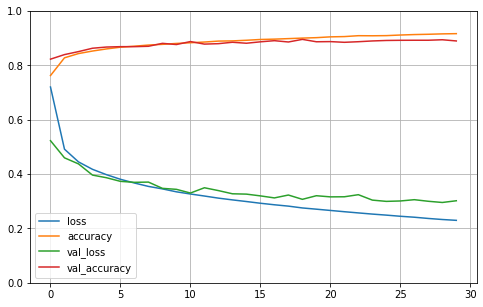

In [31]:
pd.DataFrame(history.history).plot(figsize=(8,5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()